# Esercitazione su Moduli e Classi

## Esercizio 0 

* Creare il file python `somme.py` in cui vanno definite due funzioni:
    * una funzione che restituisca la somma dei primi *n* numeri naturali;
    * una funzione che restituisca la somma delle radici dei primi *n* numeri naturali.
* Creare uno script python che importi il modulo `somme` appena creato  e ne utilizzi le funzioni
* Esaminare la cartella di lavoro

## Esrecizio 1

### Accessi ai Dati

I dati possono essere scaricati tramite lo script *get_data.py* del pacchetto *get-mcf-data*, dopo aver aggiornato il pacchetto stesso (`git pull`):

`python(3)  get_data.py --e09  percrso/cartella/esercitazione`

Il file di dati scaricati dovrebbero essere:
* *hit_times_M0.csv*
* *hit_times_M1.csv*
* *hit_times_M2.csv*
* *hit_times_M3.csv*

### Contenuto File

I file rappresentano i dati relativi a un (fittizio) rivelatore con sensori per fotoni organizzato in 4 moduli, ognuno contenenete 5 sensori.

* Ogni file corrisponde ai dati di un modulo.
* Ogni riga del file contiene l'informazione su un sensore che è stato colpito (*Hit*).
* Per ogni *Hit* viene riportata:
    * identificatore del moduko [0-3];
    * identificatore del sensore [0-4];
    * distanza temporale in ns dall'inizio della presa dati.
* Gli *Hit* sono orniati temporalmente all'interno di ciascun file.

I dati rappresentano un secondo di acquisizione dati.

### Geometria Rivelatore  

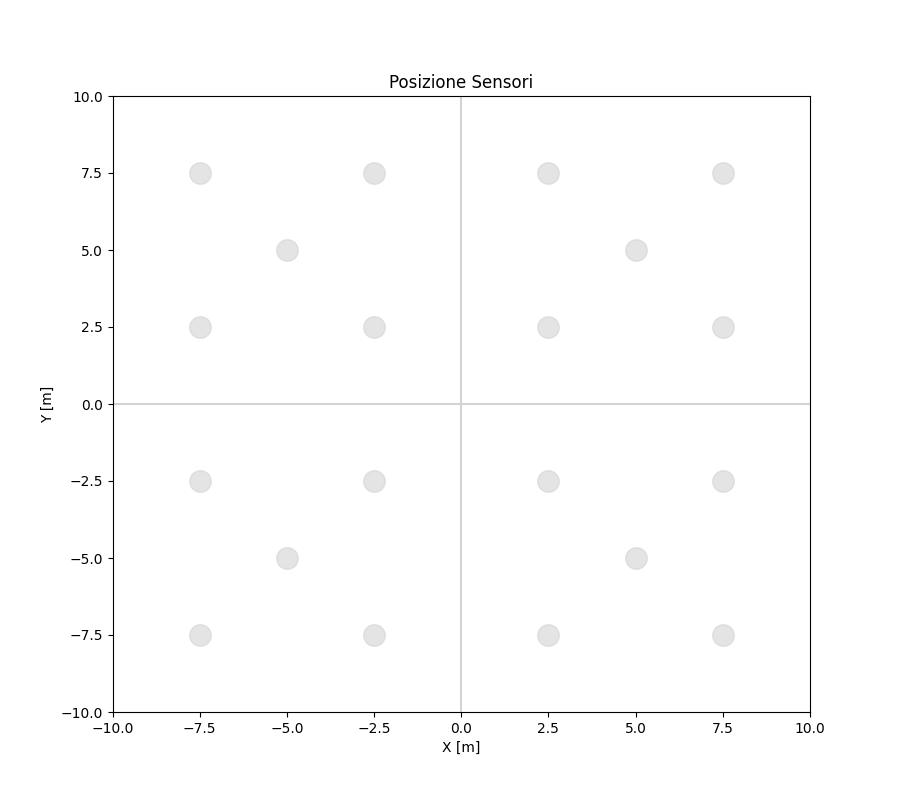

Le posizioni esatte di moduli e sensori sono fornite di seguito:

In [2]:
# Coordinate centro Moduli [m]
xmod = [-5,  5, -5,  5]
ymod = [ 5,  5, -5, -5]
        
# Coordinate dei Sensori rispetto al centro del Modulo [m]
xdet = [-2.5, 2.5, 0, -2.5,  2.5]
ydet = [ 2.5, 2.5, 0, -2.5, -2.5]

### Eventi

Si può considerare il rivelatore parte di un esperimento che che sfrutta la luce Cernkov per studuare Eventi relativi ad un fenomeno di interesse. 

Ad ogni Evento un cono di luce Cernkov investe i sensori o una parte di essi. I sensori registrano il tempo a cui i fotoni Cerenkov vengono rivelati.

Dal punto di vista del notro rivelatore, un Evento corrisponde ad un insieme di *Hit* ed alcune informazioni accessorie.

Gli *Hit* apparteneti allo stesso evento saranno presumibilmente raggruppati nel tempo mentre *Hit* apparteneti ad eventi diversi avarnno una separazione temporale maggiore.

#### Rappresentazione Grafica di un Evento

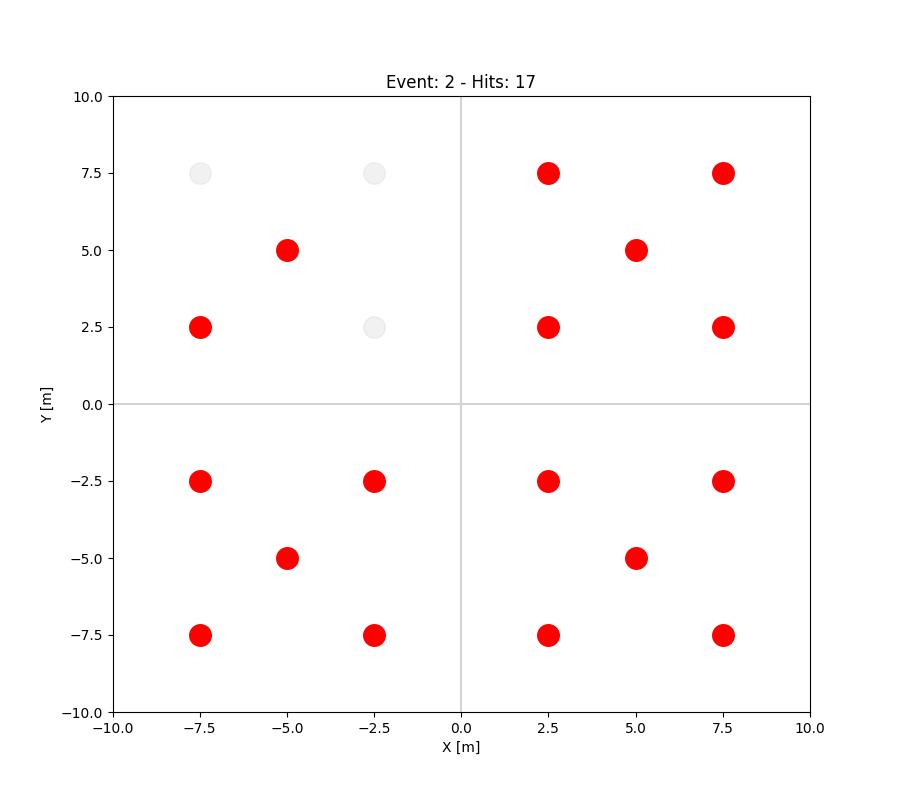

### Attività Richieste

* Passo 1:
    * Creare uno script python che esegua le seguenti operazioni:
        1. Legga uno o più file di input
        2. Produca un istogramma dei tempi per uno dei moduli (file)
        3. Produca un istogramma delle differenze di tempi ($\Delta t$) fra *Hit* consecutivi per uno dei moduli
            * SUGGERIMENTO: usare il  $\log_{10}(\Delta t)$
            * Interpretare il grafico risultante

* Passo 2:
    * Creare il file `reco.py` che:
        1. Definisca la classe *Hit*
            * Un oggetto di tipo *Hit* deve contenere informazioni su:
                * Id Modulo
                * Id Sensore
                * Time Stamp rivelazione
        2. Definisca la classe *Event*
            * Un oggetto di tipo *Event* deve contenere informazioni su:
                * Numero di Hit 
                * Time Stamp del primo *Hit*
                * Time Stamp dell'ultimo *Hit*
                * Durata temporale
                * Array di tutti gli *Hit*


* Passo 3:
    * Creare uno script python che svolga le seguenti operazioni:
        1. Importi il modulo `reco`
        2. Legga i file di dati e per ognuno di essi produca un array di `reco.Hit` 
            * SUGGERIMENTO: creare un funzione da richiamare per ogni file
        3. Produca una un array che corrisponda al conbinazione, ordinata temporalmente, di tutti i `reco.Hit`
        4. Produca un istogramma dei ($\Delta t$) fra `reco.Hit` consecutivi
            * Come stabilire la finestra temporale da applicare ai $\Delta t$ che permetta di raggruppare gli *Hit* dello stesso evento ma sepaari quelii apparteneti ad eventi differenti?
            

* Passo 4:
    * Modificare lo script del *Passo 3* aggiungendo funzionalità in modo che:
        1. Crei un array di oggeti di tipo `reco.Event` a partire dall'array ordinato di `reco.Hit` applicando auna finestra temorale ai $\Delta t$ tra `reco.Hit` consecutivi
            * SUGGERIMENTO: creare un funzione apposita
        2. Stampi informazioni dettagliate per i primi 10 `reco.Event`
            * SUGGERIMENTO: verificare che le informazioni stampate non contengano indizi di errore
        3. Produca l'istogramma del numero di `reco.Hit` per `reco.Event`
        4. Produca l'istogramma della durata dei `reco.Event`
        5. Produca l'istogramma delle differenze di tempo fra `reco.Event` consecutivi
      
      
* Passo 5:
    * Estendere lo script precedente producendo la rappresentazione grafica dei primi 10 `reco.Event` (come nell'esempio iniziale)
    * OPZIONALE: includere nella rappresentazione grafica degli eventi anche l'informazione temporale atraverso il colore dei simboli. 
        * Vedi esempio ed informazioni sul codice di seguito.
        * Si nota qualche schema nella distribuzione dei tempi?

#### Rappresentazione Grafica di un Evento con Informazione Temporale

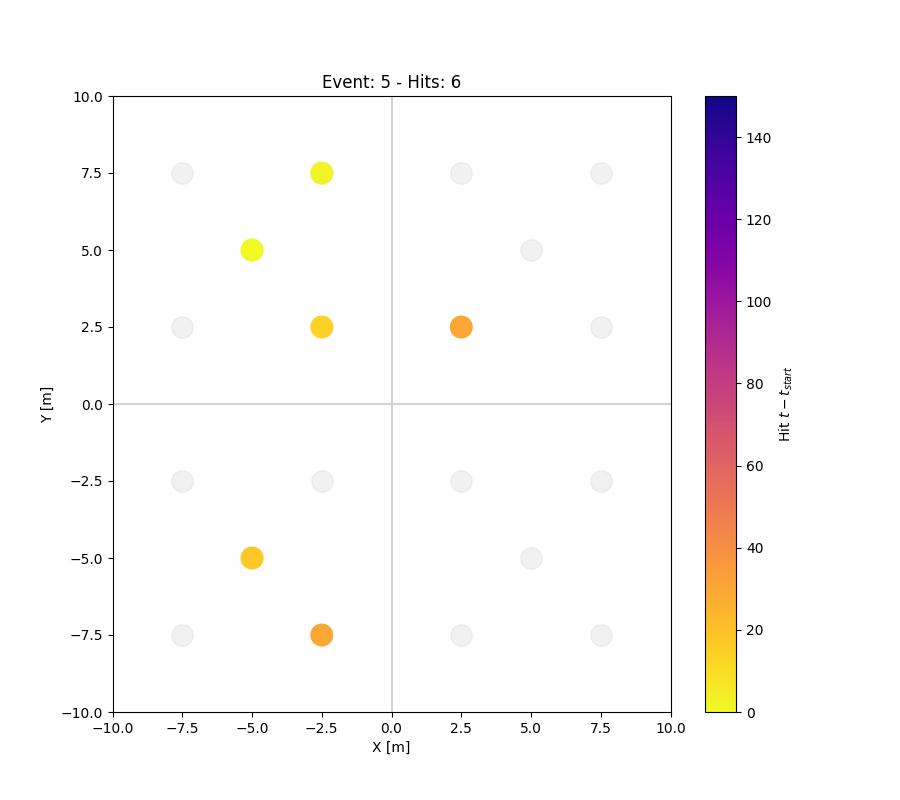

In [ ]:
# Infromazioni per prdurre uno scatter plot con simboli colorati in funzione di una variabile
#  e la corrispondnete barra di colore (Colorbar)
#
# Assumiamo che posizione hit_x, hit_y, hit_time siano array conetenti  posizione x,y e tempi degli Hit

# Definizione area grafico 
img,ax = plt.subplots(figsize=(9,8))
# Scatter plot
# s    --> dimezione simbolo
# c    --> valori rispetto a cui sarà definito il colore del simbolo
# cmap --> tipo di mappa di colore (vedere https://matplotlib.org/stable/tutorials/colors/colormaps.html)
plt.scatter(hit_x, hit_y,      s=240,  c=hit_time, cmap='plasma_r')
# ...
# Colorbar 
plt.colorbar( ax=ax, label='Hit $t-t_{start}$') 
# Limite valori Colorbar
plt.clim(0, 150)
#...


Opzioni colormap: https://matplotlib.org/stable/tutorials/colors/colormaps.html